<a href="https://colab.research.google.com/github/shanksms/pandas_master_repo/blob/main/pivot_tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Analyze Titanic Dataset

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Question:** Find survial rate by Gender?

In [ ]:
titanic.groupby(['sex'])['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

**Question:** Find survival rate by gender and class?

In [ ]:
titanic.pivot_table('survived', columns=['class'], index='sex', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


**Multi level pivot tables**

In [ ]:
titanic['age_range'] = pd.cut(titanic['age'], [0, 18, 80])

**Question: ** Find survival rate by gender, age and class?

In [ ]:
titanic.pivot_table(values='survived', index=['sex', 'age_range'], columns='class', aggfunc='mean')

class                First    Second     Third
sex    age_range                              
female (0, 18]    0.909091  1.000000  0.511628
       (18, 80]   0.972973  0.900000  0.423729
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 80]   0.375000  0.071429  0.133663

Move age_range to column

In [ ]:
titanic.pivot_table(values='survived', index=['sex'], columns=['class', 'age_range'], aggfunc='mean')

class         First            Second               Third          
age_range   (0, 18]  (18, 80] (0, 18]  (18, 80]   (0, 18]  (18, 80]
sex                                                                
female     0.909091  0.972973     1.0  0.900000  0.511628  0.423729
male       0.800000  0.375000     0.6  0.071429  0.215686  0.133663

**Question:** Find survival rate and mean of fare by Gender and class?

In [ ]:
titanic.pivot_table(values=['survived', 'fare'], index=['sex'], columns=['class'], aggfunc={'fare': 'mean', 'survived': sum})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

**Compute totals along each grouping**

In [ ]:
titanic.pivot_table('survived', columns=['class'], index='sex', aggfunc='mean', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Analyze US birth rate data

In [ ]:
births = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_science_handbook/data/births.csv')

In [ ]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


**Add a new column decade**



In [ ]:
births['decade'] = 10 * (births.loc[:, 'year'] // 10)

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


**Question:** Find number of births of Male and Female by decade?

In [ ]:
births.pivot_table(values='births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Plot above dataframe

Text(0, 0.5, 'total births per year')

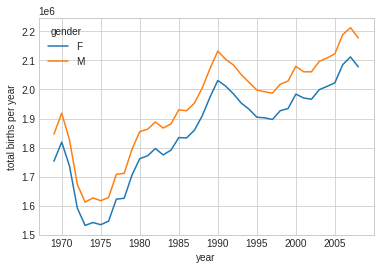

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
births.pivot_table(values='births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')
